# 2. Statistical Analysis - California Housing

**Goal:** Rigorously test assumptions, detect outliers, and explore feature interactions.

**Focus:**
- Outlier detection via Z-Score
- Hypothesis testing (Income vs. Price)
- Interaction effects visualization

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

sns.set_style("whitegrid")
housing = fetch_california_housing(as_frame=True)
df = housing.frame

## 1. Outlier Detection (Z-Score)

Highly skewed features like `AveRooms` and `AveBedrms` often contain extreme outliers that can bias linear models.

In [2]:
cols_to_check = ['AveRooms', 'AveBedrms', 'Population']
z_scores = np.abs(stats.zscore(df[cols_to_check]))
outliers = (z_scores > 3).any(axis=1)

print(f"Total districts: {len(df)}")
print(f"Districts with Z-Score > 3: {outliers.sum()} ({outliers.sum()/len(df):.1%})")

# Creative a clean dataframe for statistical validity
df_clean = df[~outliers].copy()
print(f"Cleaned dataset size: {len(df_clean)}")

Total districts: 20640
Districts with Z-Score > 3: 501 (2.4%)
Cleaned dataset size: 20139


## 2. Hypothesis Testing: The 'Income Effect'

**H₀:** There is no significant difference in median house prices between High-Income and Low-Income districts.  
**H₁:** High-Income districts have significantly higher median house prices.

In [3]:
median_inc = df_clean['MedInc'].median()
high_inc_prices = df_clean[df_clean['MedInc'] > median_inc]['MedHouseVal']
low_inc_prices = df_clean[df_clean['MedInc'] <= median_inc]['MedHouseVal']

t_stat, p_val = stats.ttest_ind(high_inc_prices, low_inc_prices, equal_var=False)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_val:.5e}")

if p_val < 0.05:
    print("\n✅ REJECT H₀: Median Income is a statistically significant driver of house prices.")
else:
    print("\n❌ Fail to reject H₀.")

T-Statistic: 85.88
P-Value: 0.00000e+00

✅ REJECT H₀: Median Income is a statistically significant driver of house prices.


## 3. Investigating Feature Interactions

Does the relationship between Income and Price vary by region? Let's use Latitude to create a North/South proxy.

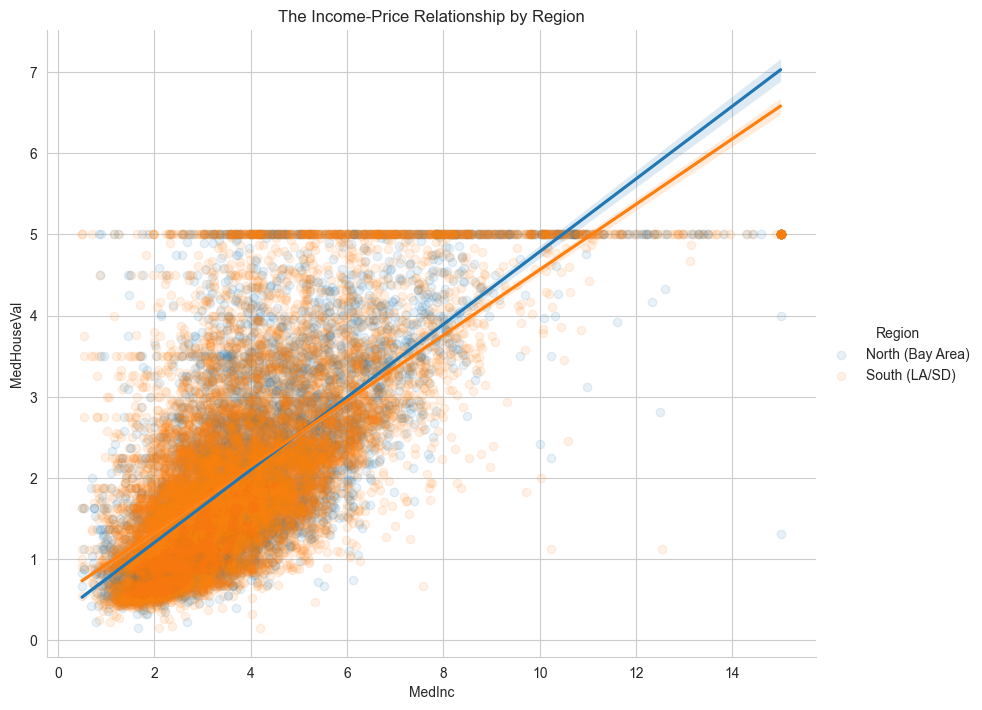


💡 INSIGHT: While the general trend is similar, the 'premium' (intercept) differs noticeably between regions.


In [4]:
df_clean['Region'] = np.where(df_clean['Latitude'] > 37, 'North (Bay Area)', 'South (LA/SD)')

sns.lmplot(x="MedInc", y="MedHouseVal", hue="Region", data=df_clean, 
           scatter_kws={'alpha': 0.1}, height=7, aspect=1.2)
plt.title("The Income-Price Relationship by Region")
plt.show()

print("\n💡 INSIGHT: While the general trend is similar, the 'premium' (intercept) differs noticeably between regions.")